<a href="https://colab.research.google.com/github/NyashaNziramasanga/Masters-of-Computer-Science/blob/master/2021-Semester-2/COMP8715-heuristic-optimisation/Practicals/COMP2712_2021_Practical02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP2712 Practical02: Discover the 'optimal' settings for the MLP
A notebook to explore some basic properties of the multi-layer percepton (MLP) and evaluation methodologies.

The notebook currently uses the train-test split to evaluate the classifier.  With the given parameters it does a very poor job at classifying the non-linearly separable data set. Plus, the train-test split methodology does not fully explore the data.

Your task is to convert the evaluation methodology to use k-fold validation and to find the best settings for the MLP to classify the data.

You should review the [documentation for the MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) to see what the different parameters do to the learning.

The notebook [COMP2712 Evaluating Machine Learning](https://colab.research.google.com/drive/1tbbjAMc9QetoYQRsB19KagXBz6d9Pqwl?usp=sharing) contains an example of how to use k-fold validation and you can find documentation at sckit-learn here: [Cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html), particularly the section on [Stratified K-Fold](https://scikit-learn.org/stable/modules/cross_validation.html#stratified-k-fold).

If you need some help on Python have a look at this notebook: [COMP2712 Introduction to Python Exercise Sheet](https://colab.research.google.com/drive/1uWzTZOA8EyyitUfc7sYlOH6JoNBKi5qE?usp=sharing)

## Import Modules
First we need to import the neccesary modules for our machine learning extravaganza!
- [numpy](https://numpy.org/): is the fundamental package for scientific computing with Python
- [pandas](https://pandas.pydata.org/): a fast, powerful, flexible and easy to use open source data analysis and manipulation tool
- [maplotlib](https://matplotlib.org/): a comprehensive library for creating static, animated, and interactive visualizations in Python
- [seaborn](https://seaborn.pydata.org/) : Seaborn is a Python data visualization library based on matplotlib. 
- [sklearn](https://scikit-learn.org/): an open source machine learning library that supports supervised and unsupervised learning. 

In [9]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


## Bookmaker Evaluation Measure
Define a function to calculate the bookmaker informedness measure to evaluate the classifier.

In [13]:
def calculate_bm(cm):

  TN = cm[1][1]
  FN = cm[0][1]
  TP = cm[0][0]
  FP = cm[1][0]

  # Sensitivity, hit rate, recall, or true positive rate
  TPR = TP/(TP+FN)
  # Specificity or true negative rate
  TNR = TN/(TN+FP) 
  # Precision or positive predictive value
  PPV = TP/(TP+FP)
  # Negative predictive value
  NPV = TN/(TN+FN)
  # Fall out or false positive rate
  FPR = FP/(FP+TN)
  # False negative rate
  FNR = FN/(TP+FN)
  # False discovery rate
  FDR = FP/(TP+FP)

  # Overall accuracy
  ACC = (TP+TN)/(TP+FP+FN+TN)
  F1 = 2*(PPV*TPR)/(PPV+TPR)
  BM = TPR + TNR - 1

  return BM

## Generate a data set this is NOT lineraly separable


          x         y  label
0 -0.218506  0.920587      0
1  0.350724 -0.939603      0
2 -0.734423 -0.143075      1
3 -0.126392 -0.985448      0
4  0.391406 -0.697289      1
                 x            y
count  1000.000000  1000.000000
mean      0.000750     0.004734
std       0.643761     0.643236
min      -1.098853    -1.048092
25%      -0.631305    -0.605636
50%      -0.007530     0.002689
75%       0.627990     0.639802
max       1.090583     1.096226


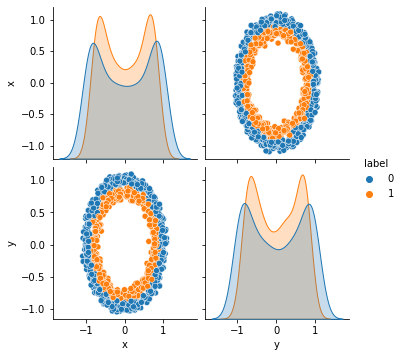

In [14]:
# generate 2d classification dataset
name_circle = 'Not Lineraly Separable'

# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.05)
# scatter plot, dots colored by class value
df_circle = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

print(df_circle.head())
print(df_circle.iloc[:,0:2].describe())
sns.pairplot(data=df_circle,hue='label')

## Now let's get ready for testing out the MLP

Choose a dataset and spilt into input features and target

In [16]:
df = df_circle # NOT linearily separable
data_name = name_circle

y = df[['label']] # target attributes
X = df.iloc[:, 0:2] # input attributes/features
print(X.head())

X.describe()

          x         y
0 -0.218506  0.920587
1  0.350724 -0.939603
2 -0.734423 -0.143075
3 -0.126392 -0.985448
4  0.391406 -0.697289


,x,y
count,1000.000000,1000.000000
mean,0.000750,0.004734
std,0.643761,0.643236
min,-1.098853,-1.048092
25%,-0.631305,-0.605636
50%,-0.007530,0.002689
75%,0.627990,0.639802
max,1.090583,1.096226


## Your Turn!
You should make modifications to the below to satisfy the requirments of the Practical02.

Run the below to see what you performance it acheived without modification - it should not be very good.  Then start to explore how to make the performance better (**Checkpoint01**). The section below starting with **### Set up the Model** is where we can change settings and evaluate the affect on performance.  You can change settings such as
 - `hidden_layer_sizes`: fewer nodes means less to optimize and quicker training, but too few nodes cannot model more complex problems.  How does it go with 1, 2, 3, 5, 10, more?
 - `max_iter`: the number of iterations to train for.  Too many will take too long, but too few and the MLP may stop before it converges.  What's the smallest max_iter to get 'good' performance?


You should then look to characterise the performance with cross fold validation (**Checkpoint02**), rather than the `train_test_split`.  Read through the [Cross-validataion](https://scikit-learn.org/stable/modules/cross_validation.html) documentation, specifically the [Stratified k-fold](https://scikit-learn.org/stable/modules/cross_validation.html#stratified-k-fold) for how to implement using scikit-learn.  You should also view the example Colab notebook from the topic on [Evaluating Machine Learning](https://colab.research.google.com/drive/1tbbjAMc9QetoYQRsB19KagXBz6d9Pqwl?usp=sharing).



Have a look at the [documentation for the MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) to see what the different parameters do to the learning (**Checkpoint03**).



3499720
Iteration 1436, loss = 0.63494077
Iteration 1437, loss = 0.63488573
Iteration 1438, loss = 0.63484100
Iteration 1439, loss = 0.63478032
Iteration 1440, loss = 0.63472324
Iteration 1441, loss = 0.63467163
Iteration 1442, loss = 0.63461495
Iteration 1443, loss = 0.63456364
Iteration 1444, loss = 0.63450830
Iteration 1445, loss = 0.63445908
Iteration 1446, loss = 0.63438615
Iteration 1447, loss = 0.63433488
Iteration 1448, loss = 0.63428004
Iteration 1449, loss = 0.63422636
Iteration 1450, loss = 0.63417190
Iteration 1451, loss = 0.63411295
Iteration 1452, loss = 0.63406156
Iteration 1453, loss = 0.63400500
Iteration 1454, loss = 0.63395012
Iteration 1455, loss = 0.63389792
Iteration 1456, loss = 0.63383661
Iteration 1457, loss = 0.63377972
Iteration 1458, loss = 0.63372815
Iteration 1459, loss = 0.63367558
Iteration 1460, loss = 0.63361409
Iteration 1461, loss = 0.63357219
Iteration 1462, loss = 0.63350383
Iteration 1463, loss = 0.63344980
Iteration 1464, loss = 0.63339432
Iterat

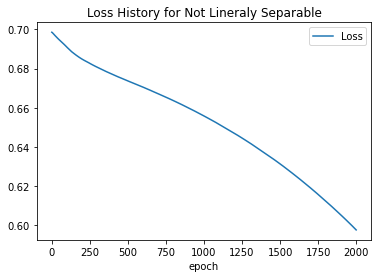

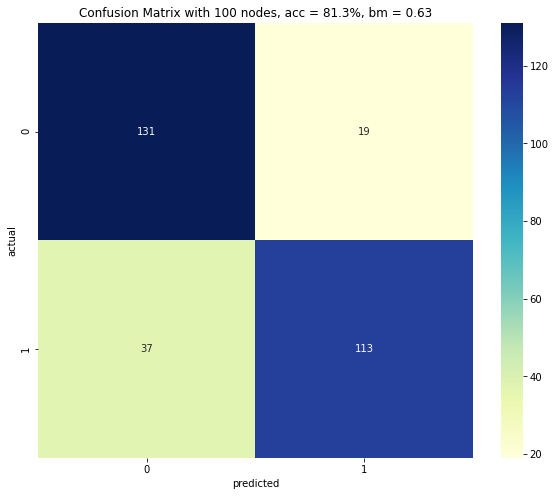

In [57]:
### Split into training and testing
#
# Here we use the `train_test_split` function from the `sklearn.model_selection` module.  The parameter `test_size=0.3` specifies the percentage (30%) of the data to use as test data, `random_state=0` sets the random generator to a specific state, and `stratify=y` is important to maintain the same ratio of class distribution between the train and test splits.
#
# This is the simplest way to split the data.
#
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# converting to float 32bit
x_train = np.array(x_train).astype(np.float32)
x_test  = np.array(x_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test  = np.array(y_test).astype(np.float32)

# print data split for validation
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

### Set up the model
#
# Setting up the model is where we can change settings and evaluate the affect on performance.  You can change settings such as# - `hidden_layer_sizes`: fewer nodes means less to optimize and quicker training, but too few nodes cannot model more complex problems.  How does it go with 1, 2, 3, 5, 10, more?# - `max_iter`: the number of iterations to train for.  Too many will take too long, but too few and the MLP may stop before it converges.  What's the smallest max_iter to get 'good' performance?
#
# Have a look at the [documentation for the MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) to see what the different parameters do to the learning.

# model initialization
hidden_layer_size = 100
max_iter = 2000
mlp = MLPClassifier(hidden_layer_sizes=(hidden_layer_size), max_iter=max_iter, alpha=0.01, #try change hidden layer, or max_iter
                    solver='sgd', verbose=1, tol=0.000001, #try verbode=0 to train with out logging
                    # learning_rate='adaptive',
                    # activation='logistic',
                    early_stopping=False,
                    momentum=0.9) 

### Train the Model
# The function call to `fit` trains the model using the training data.  
h = mlp.fit(x_train,y_train)

### Plot a loss curve
# The loss curve shows the history of how the training progressed.
plt.plot(h.loss_curve_)
plt.title('Loss History for ' + data_name)
plt.xlabel('epoch')
plt.legend(['Loss'])


## Evaluate the performance of the classifier
# Let's have a look at predicting the first 10 instances in the test data set.  How did it do?  How many matches?
print('predictions: {0}'.format(mlp.predict(x_test[0:10,:])))
print('acutal     : {0}'.format(np.ravel(y_test)[0:10]))

# Calculate evaluation measures
print()
print('Evaluation of hidden_layer_size: {}, max_iter: {}'.format(hidden_layer_size, max_iter))
print()
y_pred = mlp.predict(x_test)
cm = confusion_matrix(y_test, y_pred,normalize=None)
cr = classification_report(y_test,y_pred)
print(cr)
acc= accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred,average='weighted')
cm = confusion_matrix(y_test, y_pred)
bm = calculate_bm(cm)
print(cm)
print('Bookmaker for {0} is {1:.2f}'.format(data_name,bm))

# Create a confusion matrx using the function `confusion_matrix` and plot using seaborn
df_cm = pd.DataFrame(cm, columns=['0','1'], index=['0','1'])
fig, ax1 = plt.subplots(1,1, figsize=(10,8))
ax = sns.heatmap(df_cm, annot=True, ax=ax1, square=True,  cmap="YlGnBu", fmt='d')
ax.set_title('Confusion Matrix with {0} nodes, acc = {1:.1f}%, bm = {2:.2f}'.format(hidden_layer_size,acc*100,bm))
ax.set_xlabel('predicted')
ax.set_ylabel('actual');

